###Importance of scaling in SVM

In [1]:
import pdb

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


df = pd.read_csv('data/non_sep.csv',header=None)
x = df.loc[1:,1:2].values
y = df.loc[1:,3].values
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear'))])
pipeline.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [3]:
svc = pipeline.named_steps['svc']

In [4]:
xvals = np.linspace(-5,5,100)
yvals = (svc.intercept_+svc.coef_[0,0]*xvals)/(-1*svc.coef_[0,1])

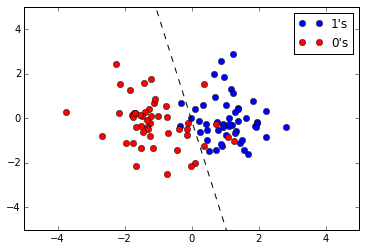

In [5]:
mask = y==1
plt.plot(x[mask,0],x[mask,1],'bo',label='1\'s')
plt.plot(x[~mask,0],x[~mask,1],'ro',label='0\'s')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.plot(xvals,yvals,color='black',linestyle='--')
plt.show()

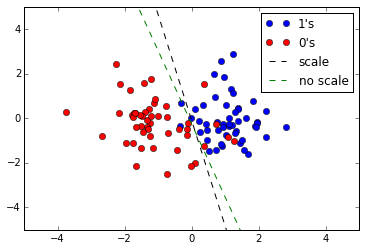

In [6]:
svc1 = SVC(kernel='linear')
svc1.fit(x, y)
yvals1 = (svc1.intercept_+svc1.coef_[0,0]*xvals)/(-1*svc1.coef_[0,1])
mask = y==1
plt.plot(x[mask,0],x[mask,1],'bo',label='1\'s')
plt.plot(x[~mask,0],x[~mask,1],'ro',label='0\'s')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.plot(xvals,yvals,color='black',linestyle='--',label='scale')
plt.plot(xvals,yvals1,color='green',linestyle='--',label='no scale')
plt.legend()
plt.show()

In [7]:
from sklearn.cross_validation import cross_val_score

#cross_val_score(pipeline,x,y,scoring=lambda m,x,y:m.score(x,y),cv=5).mean()
cross_val_score(pipeline,x,y,scoring='accuracy',cv=5).mean()

0.93000000000000005

###Effect of hyperparameter C (maximizing the margin and minimizing classification error)

In [8]:
np.linspace(6, 1.25425000e+01, 5)

array([  6.      ,   7.635625,   9.27125 ,  10.906875,  12.5425  ])

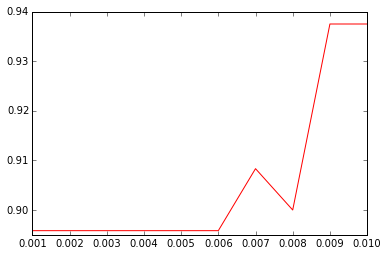

In [10]:
cv_score = []

for i in np.linspace(.001, .01, 10):
    pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear', C=i))])
    cv_score.append(cross_val_score(pipeline, x, y, scoring='accuracy', cv=20).mean())
    
plt.plot(np.linspace(.001, .01, 10),cv_score,'r-')
# plt.ylim([0.9,1.0])

####Effect of C on decision boundary

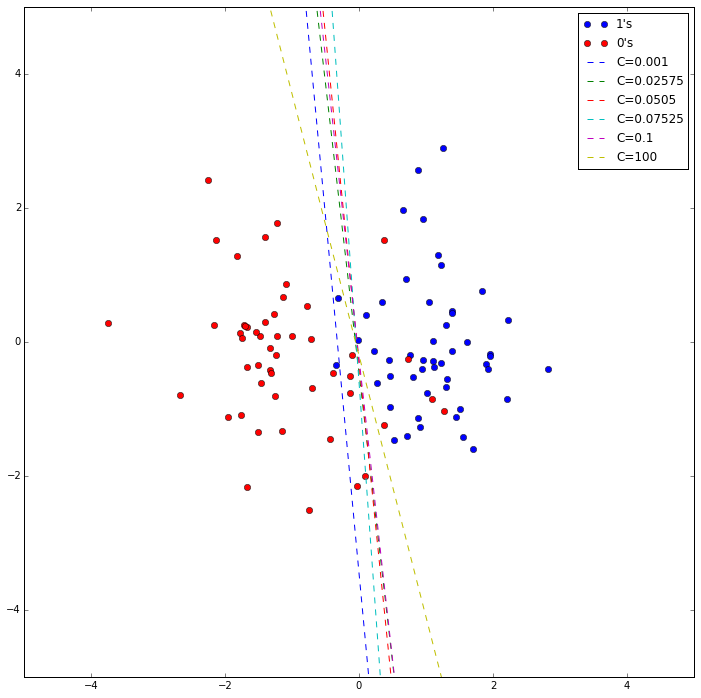

In [11]:
mask = y==1
plt.figure(figsize=(12,12))
plt.plot(x[mask,0],x[mask,1],'bo',label='1\'s')
plt.plot(x[~mask,0],x[~mask,1],'ro',label='0\'s')

xvals = np.linspace(-5,5,100)


for c in np.linspace(0.001, 0.1, 5):
    pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear', C=c))])
    pipeline.fit(x,y)
    svc = pipeline.named_steps['svc']
#     pdb.set_trace()
    yvals = (svc.intercept_+svc.coef_[0,0]*xvals)/(-1*svc.coef_[0,1])
    plt.plot(xvals,yvals,linestyle='--',label="C="+str(c))

c=100
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear', C=c))])
pipeline.fit(x,y)
svc = pipeline.named_steps['svc']
#     pdb.set_trace()
yvals = (svc.intercept_+svc.coef_[0,0]*xvals)/(-1*svc.coef_[0,1])
plt.plot(xvals,yvals,linestyle='--',label="C="+str(c))
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()


<br>

###Effects of Kernels on the decision boundaries

SVMs can use kernel functions to transform the features into a new feature
space. Thus far we have been using a linear kernel, but SVMs can use non-linear
kernels.

![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

Two of the most common nonlinear kernels are the polynomial kernel function and
the Gaussian kernel function (also known as the Radial Basis Function, or RBF).

Both of these kernels transform the data into a new space where the
data may be (more) linearly separable.


####RBF Kernel

`K(x, z) = exp(gamma * (distance(x, z))^2)`

`gamma` is a hyperparameter that determines the spread of the Gaussian around each point. `distance` is Euclidean distance.

[Wikipedia - RBF
Kernel](http://en.wikipedia.org/wiki/Radial_basis_function_kernel)

####Polynomial Kernel

`K(x, z) = (1 + x.T.dot(z))^d`


`d` is a hyperparameter that determines the degree of the polynomial transform.

[Wikipedia - Polynomial Kernel](http://en.wikipedia.org/wiki/Polynomial_kernel)

In practice, RBF kernels are more often used (scikit learn uses the RBF as the
default kernel in SVC). The polynomial kernel at high degrees often leads to
overfitting.

In [21]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf'))])
pipeline.fit(x,y)
svc_rbf = pipeline.named_steps['svc']
print cross_val_score(svc_rbf, x, y, scoring='accuracy', cv=10).mean()

pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='poly'))])
pipeline.fit(x,y)
svc_poly = pipeline.named_steps['svc']
print cross_val_score(svc_poly, x, y, scoring='accuracy', cv=10).mean()

0.9
0.9


In [13]:
def decision_boundary(clf, X, Y, h=.02):        
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

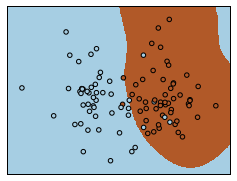

In [15]:
decision_boundary(svc_rbf, x, y)

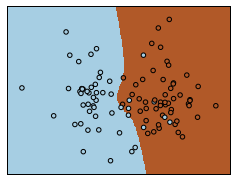

In [16]:
decision_boundary(svc_poly, x, y)

###Using Grid Search to optimize hyperparameters

####Polynomial Kernel

In [17]:
from sklearn.grid_search import GridSearchCV
parameters = {'degree':np.arange(2,10),'C':np.logspace(-2,3,6)}
svc = SVC(kernel='poly')
clf = GridSearchCV(svc, parameters,scoring='accuracy')
clf.fit(x,y)
clf.grid_scores_

[mean: 0.49000, std: 0.01473, params: {'C': 0.01, 'degree': 2},
 mean: 0.89000, std: 0.04006, params: {'C': 0.01, 'degree': 3},
 mean: 0.51000, std: 0.01386, params: {'C': 0.01, 'degree': 4},
 mean: 0.75000, std: 0.06929, params: {'C': 0.01, 'degree': 5},
 mean: 0.54000, std: 0.03668, params: {'C': 0.01, 'degree': 6},
 mean: 0.75000, std: 0.01201, params: {'C': 0.01, 'degree': 7},
 mean: 0.54000, std: 0.02773, params: {'C': 0.01, 'degree': 8},
 mean: 0.76000, std: 0.08784, params: {'C': 0.01, 'degree': 9},
 mean: 0.50000, std: 0.00000, params: {'C': 0.10000000000000001, 'degree': 2},
 mean: 0.87000, std: 0.03476, params: {'C': 0.10000000000000001, 'degree': 3},
 mean: 0.53000, std: 0.04246, params: {'C': 0.10000000000000001, 'degree': 4},
 mean: 0.87000, std: 0.01820, params: {'C': 0.10000000000000001, 'degree': 5},
 mean: 0.53000, std: 0.04878, params: {'C': 0.10000000000000001, 'degree': 6},
 mean: 0.82000, std: 0.04494, params: {'C': 0.10000000000000001, 'degree': 7},
 mean: 0.57000

In [18]:
clf.best_params_

{'C': 0.01, 'degree': 3}

####RBF Kernel

In [19]:
from sklearn.grid_search import GridSearchCV
parameters = {'gamma':np.logspace(0,5,6),'C':np.linspace(0.001,1,10)}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters,scoring='accuracy')
clf.fit(x,y)
clf.grid_scores_

[mean: 0.91000, std: 0.00260, params: {'C': 0.001, 'gamma': 1.0},
 mean: 0.79000, std: 0.02477, params: {'C': 0.001, 'gamma': 10.0},
 mean: 0.55000, std: 0.01481, params: {'C': 0.001, 'gamma': 100.0},
 mean: 0.53000, std: 0.00087, params: {'C': 0.001, 'gamma': 1000.0},
 mean: 0.53000, std: 0.00087, params: {'C': 0.001, 'gamma': 10000.0},
 mean: 0.56000, std: 0.02408, params: {'C': 0.001, 'gamma': 100000.0},
 mean: 0.91000, std: 0.00260, params: {'C': 0.112, 'gamma': 1.0},
 mean: 0.79000, std: 0.02477, params: {'C': 0.112, 'gamma': 10.0},
 mean: 0.55000, std: 0.01481, params: {'C': 0.112, 'gamma': 100.0},
 mean: 0.53000, std: 0.00087, params: {'C': 0.112, 'gamma': 1000.0},
 mean: 0.53000, std: 0.00087, params: {'C': 0.112, 'gamma': 10000.0},
 mean: 0.56000, std: 0.02408, params: {'C': 0.112, 'gamma': 100000.0},
 mean: 0.90000, std: 0.01733, params: {'C': 0.223, 'gamma': 1.0},
 mean: 0.79000, std: 0.02477, params: {'C': 0.223, 'gamma': 10.0},
 mean: 0.55000, std: 0.01481, params: {'C': 0

In [20]:
clf.best_params_

{'C': 0.44500000000000001, 'gamma': 1.0}

0.91


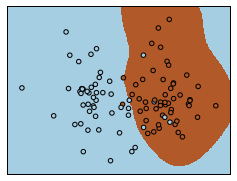

0.89


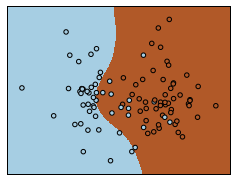

In [23]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf',C=0.445,gamma=1.0))])
pipeline.fit(x,y)
svc_rbf = pipeline.named_steps['svc']
print cross_val_score(svc_rbf, x, y, scoring='accuracy', cv=10).mean()

decision_boundary(pipeline.named_steps['svc'], x, y)

pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='poly',C=0.01,degree=3))])
pipeline.fit(x,y)
svc_poly = pipeline.named_steps['svc']
print cross_val_score(svc_poly, x, y, scoring='accuracy', cv=10).mean()

decision_boundary(pipeline.named_steps['svc'], x, y)

###Effects of unbalanced classes (need to oversample, i.e. inverse frequency of the class)

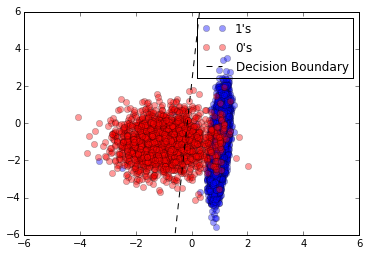

In [24]:
df2=pd.read_csv('data/imbalanced.csv',header=None,skiprows=1)
x = df2.loc[:,1:2].values
y = df2.loc[:,3].values


pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear'))])
pipeline.fit(x, y)
svc = pipeline.named_steps['svc']
xvals = np.linspace(-5,5,100)
yvals = (svc.intercept_+svc.coef_[0,0]*xvals)/(-1*svc.coef_[0,1])

mask = y==1
plt.plot(x[mask,0],x[mask,1],'bo',label='1\'s',alpha=0.4)
plt.plot(x[~mask,0],x[~mask,1],'ro',label='0\'s',alpha=0.4)
plt.plot(xvals,yvals,color='black',linestyle='--',label='Decision Boundary')
plt.legend()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

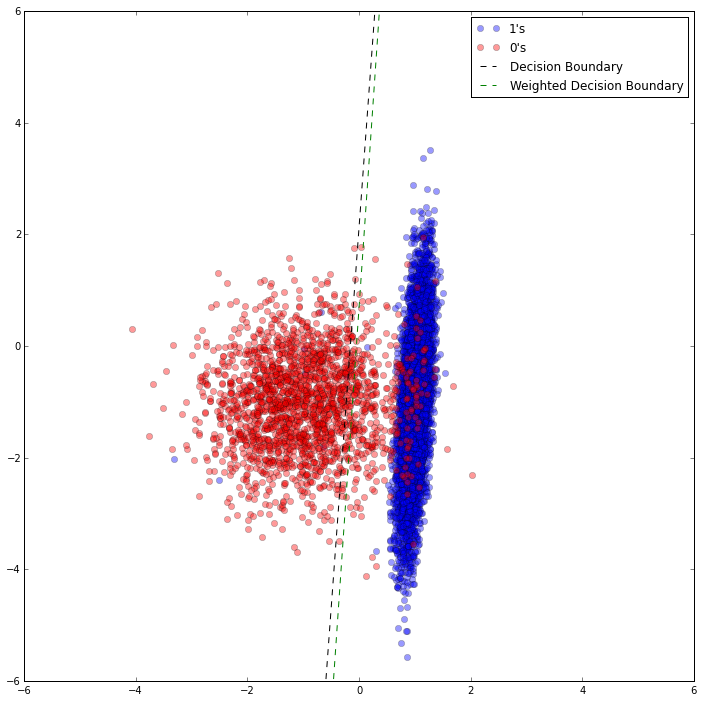

In [25]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear',class_weight='auto'))])
pipeline.fit(x, y)
svc1 = pipeline.named_steps['svc']
xvals1 = np.linspace(-5,5,100)
yvals1 = (svc1.intercept_+svc1.coef_[0,0]*xvals)/(-1*svc1.coef_[0,1])
plt.figure(figsize=(12,12))
mask = y==1
plt.plot(x[mask,0],x[mask,1],'bo',label='1\'s',alpha=0.4)
plt.plot(x[~mask,0],x[~mask,1],'ro',label='0\'s',alpha=0.4)
plt.plot(xvals,yvals,color='black',linestyle='--',label='Decision Boundary')
plt.plot(xvals1,yvals1,color='green',linestyle='--',label='Weighted Decision Boundary')
plt.legend()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

###Weighted vs. Not weighted

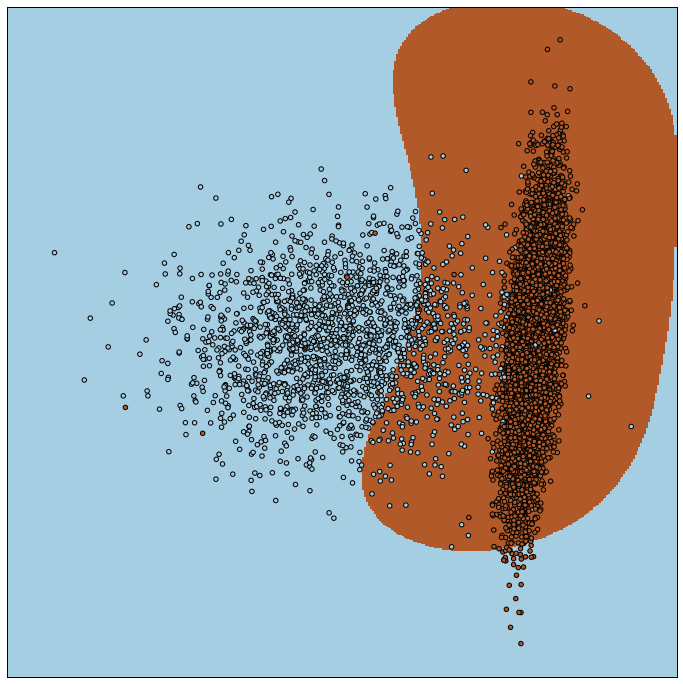

In [26]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf',class_weight='auto',C=.01))])
pipeline.fit(x, y)
svc2 = pipeline.named_steps['svc']
plt.figure(figsize=(12,12))
decision_boundary(svc2,x,y)
plt.show()

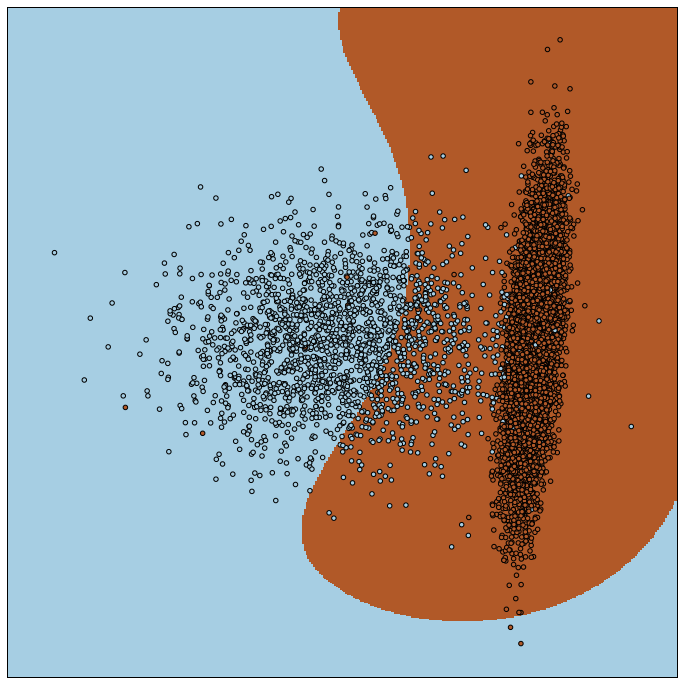

In [27]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf',C=.01))])
pipeline.fit(x, y)
svc2 = pipeline.named_steps['svc']
plt.figure(figsize=(12,12))
decision_boundary(svc2,x,y)
plt.show()

##Using cross-validation to select the best model when can't plot them

In [28]:
df3 = pd.read_csv('data/dataset_1.csv')
x = df3[['x1','x2','x3','x4']].values
y = df3[['y']].values[:,0]

In [29]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf'))])

print cross_val_score(pipeline, x, y, scoring='accuracy', cv=10).mean()

pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='poly'))])

print cross_val_score(pipeline, x, y, scoring='accuracy', cv=10).mean()

pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear'))])

print cross_val_score(pipeline, x, y, scoring='accuracy', cv=10).mean()

0.96967022065
0.964450009164
0.954858836748


##SVM Applications to Wide and Tall Data

###Wide Data

In [30]:
df4 = pd.read_csv('data/dataset_2.csv',header=False)
df4 = df4.drop('Unnamed: 0',axis=1)
y = df4['0'].values
x = df4.drop('0',axis=1).values

In [31]:
x.shape, y.shape

((72, 7129), (72,))

In [32]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='rbf',class_weight='auto'))])
parameters = {'svc__gamma': np.logspace(-2,2,3),'svc__C':np.logspace(-2,2,3)}
clf = GridSearchCV(pipeline, param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_score_

0.65277777777777779

In [33]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear',class_weight='auto'))])
parameters = {'svc__C':np.logspace(-2,2,3)}
clf = GridSearchCV(pipeline, param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_score_

0.98611111111111116

Linear kernel much faster and better

###Tall Data

In [34]:
df5 = pd.read_csv('data/dataset_3_1.csv')
df5.shape
index = np.random.choice(range(200000),size=20000,replace=False)
df5_sample = df5.loc[index]

In [35]:
x = df5_sample.drop('0', axis=1).values
y = df5_sample['0'].values

In [36]:
from sklearn.svm import LinearSVC
svc_linear = LinearSVC()
parameters = {'C':np.logspace(-2,2,3)}
clf = GridSearchCV(svc_linear, parameters, scoring='accuracy', cv=10)
clf.fit(x,y)
clf.best_score_

0.62044999999999995

In [38]:
svc_rbf = SVC(kernel='rbf')
parameters = {'C':np.logspace(-2,2,3), 'gamma':np.logspace(-2,2,3)}
clf = GridSearchCV(svc_rbf, parameters, scoring='accuracy', cv=10)
clf.fit(x,y)
clf.best_score_

KeyboardInterrupt: 

RBF is better

##Multiclass SVM (One Vs. One, One vs. Rest) 

To train a binary classifier to identify multiple classes often something called one-vs-rest is used, which trains each possible class against all other classes at a time. Another option, implemented by default in SVC is one-vs-one, which trains each class against the other.

   1. How many models need to be trained to predict all classes in a one-vs-rest approach?
   
   `# of models = n classes`
   
   2. In a one-vs-one? (Remember, you don't need to train both x vs. y and y vs. x).
   
   `# of models = n_classes * (n_classes - 1) / 2`
   
In scikit-learn the default SVC handles multiclass internally  one-vs-one , but other 
classification algorithms use one-vs-rest.  For this exercise we will be 
using [scikit-learns](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest) 
one-vs-the-rest classifier.

9


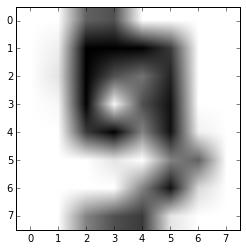

Logistic Regression, One vs. Rest
Accuracy:  0.993322203673
Recall:  0.993322203673
Precision:  0.993353490982
Logistic Regression, One vs. One
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
Linear SVC, One vs. Rest
Accuracy:  0.989426822482
Recall:  0.989426822482
Precision:  0.989564514489
Linear SVC, One vs. One
Accuracy:  1.0
Recall:  1.0
Precision:  1.0


In [39]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.cross_validation import train_test_split
data = load_digits(n_class=10)
images = data.images.reshape(1797,64)
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data.images[9],cmap='Greys')
print data.target[9]
plt.show()
data.images.shape,data.target.shape
LogVsAll = OneVsRestClassifier(LogisticRegression())
LogVsOne = OneVsOneClassifier(LogisticRegression())
LinVsAll = OneVsRestClassifier(LinearSVC())
LinVsOne = OneVsOneClassifier(LinearSVC())

print "Logistic Regression, One vs. Rest"
LogVsAll.fit(images,data.target)
y_pred = LogVsAll.predict(images)

print "Accuracy: ", accuracy_score(data.target,y_pred)
print "Recall: ", recall_score(data.target,y_pred)
print "Precision: ", precision_score(data.target,y_pred)

print "Logistic Regression, One vs. One"
LinVsOne.fit(images,data.target)
y_pred = LinVsOne.predict(images)

print "Accuracy: ", accuracy_score(data.target,y_pred)
print "Recall: ", recall_score(data.target,y_pred)
print "Precision: ", precision_score(data.target,y_pred)

print "Linear SVC, One vs. Rest"
LinVsAll.fit(images,data.target)
y_pred = LinVsAll.predict(images)

print "Accuracy: ", accuracy_score(data.target,y_pred)
print "Recall: ", recall_score(data.target,y_pred)
print "Precision: ", precision_score(data.target,y_pred)

print "Linear SVC, One vs. One"
LinVsOne.fit(images,data.target)
y_pred = LinVsOne.predict(images)

print "Accuracy: ", accuracy_score(data.target,y_pred)
print "Recall: ", recall_score(data.target,y_pred)
print "Precision: ", precision_score(data.target,y_pred)

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data.target, y_pred)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]])

##Example: Bacterial Identification

The data in `data/bio.csv` is a dataset of microbiome data. More specifically samples from two seperate locations (stool or tissue) and the counts of different bacteria obtained from RNA sequencing.  `location` is your label in this case.e

1. We will need to clean the data slightly.  First drop the `Group` column as we wil not be using it.
2. Pivot the data to look like the following (each row corresponds to a patient's bacteria counts in stool or tissue):

<table border=\1\ class=\dataframe\>
          <thead>
            <tr style=\text-align: right;\>
              <th>Taxon</th>
              <th>Location</th>
              <th>Actinobacteria</th>
              <th>Bacteroidetes</th>
              <th>Firmicutes</th>
              <th>Other</th>
              <th>Proteobacteria</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <th>0</th>
              <td> 0</td>
              <td> 1590</td>
              <td> 67</td>
              <td>  136</td>
              <td> 195</td>
              <td> 2469</td>
            </tr>
            <tr>
              <th>1</th>
              <td> 1</td>
              <td>    4</td>
              <td>  0</td>
              <td> 4182</td>
              <td>  18</td>
              <td> 1821</td>
            </tr>
            <tr>
              <th>2</th>
              <td> 0</td>
              <td>   25</td>
              <td>  0</td>
              <td> 1174</td>
              <td>  42</td>
              <td>  839</td>
            </tr>
            <tr>
              <th>3</th>
              <td> 1</td>
              <td>    2</td>
              <td>  0</td>
              <td>  703</td>
              <td>   2</td>
              <td>  661</td>
            </tr>
            <tr>
              <th>4</th>
              <td> 0</td>
              <td>  259</td>
              <td> 85</td>
              <td>  408</td>
              <td> 316</td>
              <td> 4414</td>
            </tr>
          </tbody>
        </table>

2. Try to fit a SVM to this data experimenting with different kernels and parameter values.
2. Use GridSearch to find the optimal parameters.

In [40]:
import pandas as pd
import numpy as np
df_b = pd.read_csv('data/bio.csv')
df_b_reduced = df_b.drop('Group', axis=1)
df_b_r_stacked = df_b_reduced.pivot('Patient', 'Taxon').stack(level=0).reset_index()
df_b_r_stacked['Location'] = np.where(df_b_r_stacked.level_1 == 'Tissue', 1,0)
df_final = df_b_r_stacked.drop(['level_1', 'Patient'], axis=1)

In [41]:
y = df_final['Location'].values
x = df_final.drop('Location', axis=1).values

In [42]:
svc_lin = SVC(kernel='linear')
parameters = {'C':np.logspace(-2,2,20)}
clf = GridSearchCV(svc_lin, parameters, scoring='accuracy', cv=10)
clf.fit(x,y)
print clf.best_score_

0.857142857143


In [43]:
svc_rbf = SVC(kernel='rbf')
parameters = {'C':np.logspace(-2,2,3), 'gamma':np.logspace(-2,2,3)}
clf = GridSearchCV(svc_rbf, parameters, scoring='accuracy', cv=10)
clf.fit(x,y)
print clf.best_score_

0.571428571429


In [44]:
svc_poly = SVC(kernel='poly')
parameters = {'C':np.logspace(-2,2,3), 'degree':np.arange(2,5,1)}
clf = GridSearchCV(svc_poly, parameters, scoring='accuracy', cv=10)
clf.fit(x,y)
print clf.best_score_

0.785714285714
